In [4]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

file = open('/Users/samzavislan-pullaro/Desktop/clustalwmethanotroph.txt', 'r')

# check for fasta format

print(file.read())

CLUSTAL O(1.2.4) multiple sequence alignment


KKQ23629.1=Candidatus_Roizmanbacteria_bacterium_GW2011_GWC1_37_12                                            --------------------------MGQKVHPKGLRLGIIYNWSS----------RWFF	24
ABX12700.1=Nitrosopumilus_maritimus_SCM1                                                                     -----------------------------------------------------------M	1
WP_054838637.1=Sulfolobus_metallicus                                                                         ----------------------------------------------------------MV	2
PXF50457=ANME1_cluster_archaeon_G37ANME1                                                                     ------------------------------------------------------------	0
OYT66495=ANME1_cluster_archaeon_ex4572_4                                                                     ------------------------------------------------------------	0
3300009062==Ga0123266_100311                                                                

In [5]:
from Bio import AlignIO

align = AlignIO.read('/Users/samzavislan-pullaro/Desktop/clustalwmethanotroph.txt', 'clustal')

print(align)

Alignment with 730 rows and 510 columns
--------------------------MGQKVHPKGLRLGIIYNW...--- KKQ23629.1=Candidatus_Roizmanbacteria_bacterium_GW2011_GWC1_37_12
--------------------------------------------...--- ABX12700.1=Nitrosopumilus_maritimus_SCM1
--------------------------------------------...--- WP_054838637.1=Sulfolobus_metallicus
--------------------------------------------...--- PXF50457=ANME1_cluster_archaeon_G37ANME1
--------------------------------------------...--- OYT66495=ANME1_cluster_archaeon_ex4572_4
--------------------------------------------...--- 3300009062==Ga0123266_100311
--------------------------------------------...--- CBH36869=uncultured_archaeon
--------------------------------------------...--- 3300008465==Ga0115360_1000001811
--------------------------------------------...--- 3300008468==Ga0115358_106516992
--------------------------------------------...--- 3300008468==Ga0115358_1000043710
--------------------------------------------...--- 3300008410==Ga011

In [6]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

calculator = DistanceCalculator('identity')

# Calculate the distance matrix
distance_matrix = calculator.get_distance(align)

print(distance_matrix)

KKQ23629.1=Candidatus_Roizmanbacteria_bacterium_GW2011_GWC1_37_12	0
ABX12700.1=Nitrosopumilus_maritimus_SCM1	0.4745098039215686	0
WP_054838637.1=Sulfolobus_metallicus	0.44705882352941173	0.3764705882352941	0
PXF50457=ANME1_cluster_archaeon_G37ANME1	0.484313725490196	0.3921568627450981	0.3784313725490196	0
OYT66495=ANME1_cluster_archaeon_ex4572_4	0.4490196078431372	0.3764705882352941	0.3666666666666667	0.039215686274509776	0
3300009062==Ga0123266_100311	0.5509803921568628	0.4294117647058824	0.4372549019607843	0.2666666666666667	0.2784313725490196	0
CBH36869=uncultured_archaeon	0.42352941176470593	0.3803921568627451	0.35686274509803917	0.23529411764705888	0.21372549019607845	0.16470588235294115	0
3300008465==Ga0115360_1000001811	0.43333333333333335	0.388235294117647	0.35686274509803917	0.2313725490196078	0.20980392156862748	0.15294117647058825	0.019607843137254943	0
3300008468==Ga0115358_106516992	0.43333333333333335	0.388235294117647	0.35686274509803917	0.23529411764705888	0.21372549019

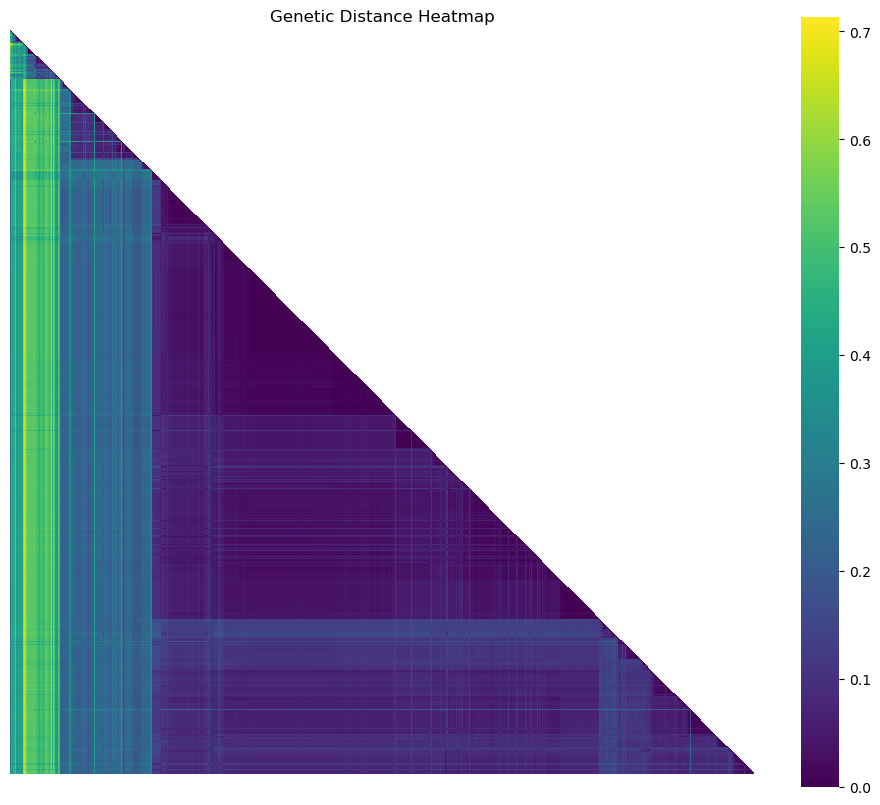

In [7]:
import pandas as pd

df = pd.DataFrame(distance_matrix.matrix, index=distance_matrix.names, columns=distance_matrix.names)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  
sns.heatmap(df, cmap="viridis", square=True, xticklabels=False, yticklabels=False)

plt.title("Genetic Distance Heatmap")
plt.show()

In [8]:
from Bio import Phylo
# Initialize the tree constructor
constructor = DistanceTreeConstructor()

# Build the tree using UPGMA
tree = constructor.upgma(distance_matrix)

# Print the tree in ASCII format
Phylo.draw_ascii(tree)


       ______ 3300024056==Ga0124853_10859323
      |
      |      _ 3300009111==Ga0115026_109224871
      |     |
      |    ,| , 3300022185==Ga0079039_11293391
      |    ||,|
      |    |||| 3300022185==Ga0079039_13992783
      |    |||
      |  __| |, 3300009167==Ga0113563_108364061
      | |  | ||
     ,| |  |  | KPQ42969=Candidatus_Methanoperedens_s...
     || |  |
     || |  |  , 3300009091==Ga0102851_112169901
     || |  |__|
     || |     | 3300012964==Ga0153916_107311451
     || |
     || | ____ AKQ01201=uncultured_euryarchaeote_Rif...
     || ||
     || ||     , 3300006224==Ga0079037_1006667882
     || ||    ,|
     ||_||   ,|| 3300009111==Ga0115026_109177241
     |  ||   ||
     |  ||  ,|| 3300022185==Ga0079039_16665941
     |  ||  ||
     |  ||  ||_ 3300009091==Ga0102851_108520981
     |  ||  ||
     |  ||  || , 3300009111==Ga0115026_100803534
     |  || _||_|
     |  ||| |  | 3300006224==Ga0079037_1013084511
     |  ||| |
     |  ||| | _ 3300009091==Ga0102851_100355446
   

In [9]:
# Create newick tree
newick_tree = tree.format("newick")
print(newick_tree) 

(((((3300024056==Ga0124853_10859323:0.15044,(((3300009111==Ga0115026_109224871:0.05760,((3300022185==Ga0079039_11293391:0.01176,3300022185==Ga0079039_13992783:0.01176)Inner543:0.03235,(3300009167==Ga0113563_108364061:0.03137,KPQ42969=Candidatus_Methanoperedens_sp_BLZ1:0.03137)Inner641:0.01275)Inner669:0.02623)Inner686:0.01734,(3300009091==Ga0102851_112169901:0.01569,3300012964==Ga0153916_107311451:0.01569)Inner573:0.05925)Inner696:0.08444,(AKQ01201=uncultured_euryarchaeote_Rifle_16ft_4_minimus_1523:0.11594,((((((3300006224==Ga0079037_1006667882:0.01961,3300009111==Ga0115026_109177241:0.01961)Inner595:0.01814,3300022185==Ga0079039_16665941:0.03775)Inner657:0.01734,(3300009091==Ga0102851_108520981:0.05000,(3300009111==Ga0115026_100803534:0.01961,3300006224==Ga0079037_1013084511:0.01961)Inner596:0.03039)Inner678:0.00509)Inner683:0.02061,(3300009091==Ga0102851_100355446:0.05135,(3300009091==Ga0102851_104486521:0.04093,((3300012964==Ga0153916_100459463:0.01765,WP_097298186=Candidatus_Methan

In [ ]:
from ete3 import Tree, TreeStyle

# This cell is ignored because of issues with rendering in github.dev 
# A figure was created in VScode and saved as a PDF in the main branch of the repository as <MethanotrophTree.pdf>

# Load Newick tree 
# t = Tree(newick_tree, format=1)

# Set tree layout
# ts = TreeStyle()
# ts.mode = "c"  # Circular mode for radial tree
# ts.show_leaf_name = True  # Show sequence names

# Display tree
# t.show(tree_style=ts)
# t.render("MethonatrophTree.pdf", tree_style=ts)


